In [1]:
using LinearAlgebra
using Plots

In [2]:
function QuanWal_1D(n::Int64,ϕ::Vector{ComplexF64},H::Matrix{Float64})  
    P=2n+1 #n-1 es el número central, #numero de pasos

    kb=[[1,0],[0,1]] #BASE USUAL en un vector de vectores que contenga cada uno

    A=Array{Vector{ComplexF64}}(undef, P) #Numero de qbits
    B=Array{Vector{ComplexF64}}(undef, P)
    @inbounds for i=1:P
        A[i]=[0,0]
        B[i]=[0,0]
    end;
    A[n+1]=ϕ
    
    for k=0:n

        if k%2!=0

            for i=(n+1)-k:(n+1)+k 
                if kb[1]*transpose(kb[1])*(H*A[i]) != [0+0im,0+0im] #Si la proyección |L><L|H|phi> es diferente de 0
                    B[i-1]=B[i-1]+kb[1]*transpose(kb[1])*(H*A[i])  #entonces en B escribira el nuevo qbit H|phi> en la posición n-1
                end                                                 #Sumandola a la anterior que estaba allí
                if kb[2]*transpose(kb[2])*(H*A[i]) != [0+0im,0+0im] #Si la proyección |R><R|H|phi> es diferente de 0
                    B[i+1]=B[i+1]+kb[2]*transpose(kb[2])*(H*A[i])   #entonces en B escribira el nuevo qbit H|phi> en la posición n+1
                end                                                  #Sumandola a la anterior que estaba allí
                for j=(n+1)-k:(n+1)+k
                    A[i]=[0,0]                                     #Por último se reescribe A para que quede en ceros [0,0]
                end
            end

        else

            for i=(n+1)-k:(n+1)+k
                if kb[1]*transpose(kb[1])*(H*B[i]) != [0+0im,0+0im]
                    A[i-1]=A[i-1]+kb[1]*transpose(kb[1])*(H*B[i])
                end
                if kb[2]*transpose(kb[2])*(H*B[i]) != [0+0im,0+0im]
                    A[i+1]=A[i+1]+kb[2]*transpose(kb[2])*(H*B[i])
                end
                for j=(n+1)-k:(n+1)+k
                    B[i]=[0,0]
                end    
            end
        end

    end
    if n%2==0
        return A
    else
        return B
    end
end

QuanWal_1D (generic function with 1 method)

  0.103560 seconds (385.12 k allocations: 32.559 MiB, 41.85% gc time)


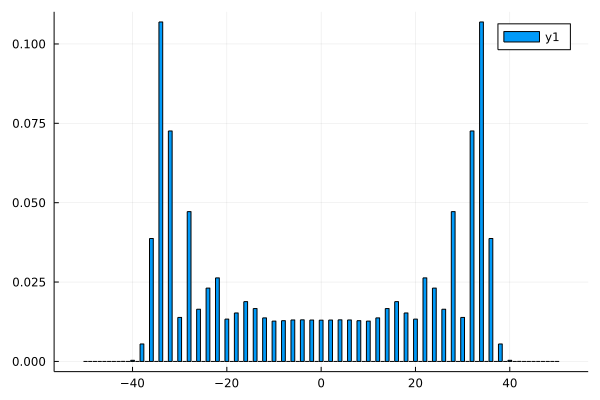

In [3]:
n=50
ϕ=1/sqrt(2)*[1, 1*im]
#ϕ=1.0/sqrt(2)*[1*im,1*im]
#ϕ=1.0*[0,1+0*im]
H=1/sqrt(2)*[1 1; 1 -1];


f(x)=(pi*(1-x^2)*sqrt(1-(2*x^2)))^(-1)


@time G=QuanWal_1D(n,ϕ,H);
bar((-n:1:n),norm.(G).^2)
#plot!(-(1/sqrt(2) - 0.1):0.001:(1/sqrt(2) - 0.1),x->f(x))

In [4]:
Dst=zeros(ComplexF64,2,2)
pos=length(G)
for i=1:pos
    Dst[1,1]+=abs2(G[i][1])      ### corresponde a izq
    Dst[1,2]+=G[i][1]*conj(G[i][2])
    Dst[2,2]+=abs2(G[i][2])      ### correspondiende der
    Dst[2,1]+=conj(G[i][1])*G[i][2]
end
Dst*Dst
tr(Dst*Dst)
tr(Dst)

0.9999999999999908 + 0.0im

In [5]:
eigvals(Dst)

2-element Vector{Float64}:
 0.29233772721801976
 0.707662272781971

In [6]:
### Entropia Lineal

n=50
S=zeros(n)

for j=1:n
    G=QuanWal_1D(j,ϕ,H)
    Dst=zeros(ComplexF64,2,2)
    pos=length(G)
    for i=1:pos
        Dst[1,1]+=abs2(G[i][1])      ### corresponde a izq
        Dst[1,2]+=G[i][1]*conj(G[i][2])
        Dst[2,2]+=abs2(G[i][2])      ### correspondiende der
        Dst[2,1]+=conj(G[i][1])*G[i][2]
    end
    S[j]=1-tr(Dst*Dst)
end

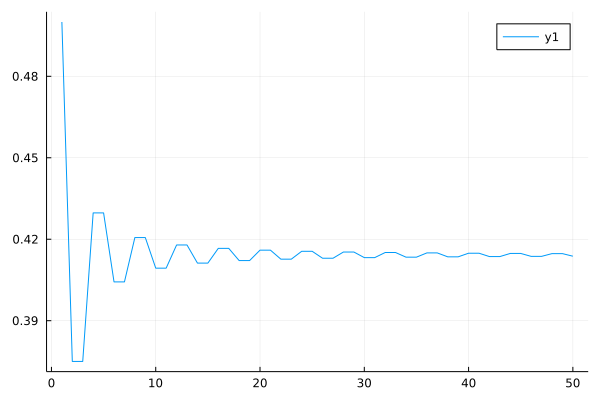

In [7]:
plot(S)

In [8]:
### Entropia Neuman con S/Kb

Sn=zeros(n)

for j=1:n
    G=QuanWal_1D(j,ϕ,H)
    Dst=zeros(ComplexF64,2,2)
    pos=length(G)
    for i=1:pos
        Dst[1,1]+=abs2(G[i][1])      ### corresponde a izq
        Dst[1,2]+=G[i][1]*conj(G[i][2])
        Dst[2,2]+=abs2(G[i][2])      ### correspondiende der
        Dst[2,1]+=conj(G[i][1])*G[i][2]
    end
    lamb=eigvals(Dst)
    Sn[j]=-(lamb[1]*log(lamb[1])+lamb[2]*log(lamb[2]))
end

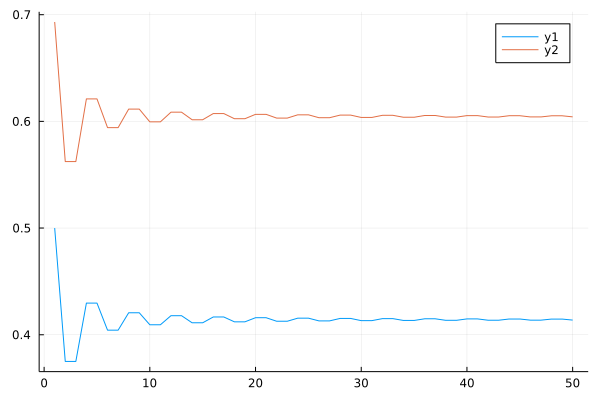

In [9]:
plot(S)
plot!(Sn)

In [9]:
stp=1
paso=500

500

In [ ]:
@time begin
    anim= @animate for l=1:stp:paso
        G=QuanWal_1D(l,ϕ,H)
        bar(-l:1:l,norm.(G).^2,xlims=(-(paso),(paso)),ylims=(0,0.05),label="Tiempo=$(l)")
    end
    gif(anim,"./QW_ONE_real(1_1).gif", fps=30)
end

In [14]:

ϕ=[1,1+0*im]

2-element Vector{Complex{Int64}}:
 1 + 0im
 1 + 0im

In [18]:
1/2*[1, 1*im]

2-element Vector{ComplexF64}:
 0.5 + 0.0im
 0.0 + 0.5im